# Iris classifier 
### Rafael Takata García

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Creation of dataframe

In [5]:
col_names = ['sepal_lenght', 'sepal_width', 'petal_lenght', 'petal_width', 'class']
df = pd.read_csv('../data/raw/iris/iris.data',header = None, names = col_names)

df.head()

,sepal_lenght,sepal_width,petal_lenght,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Quick visualization

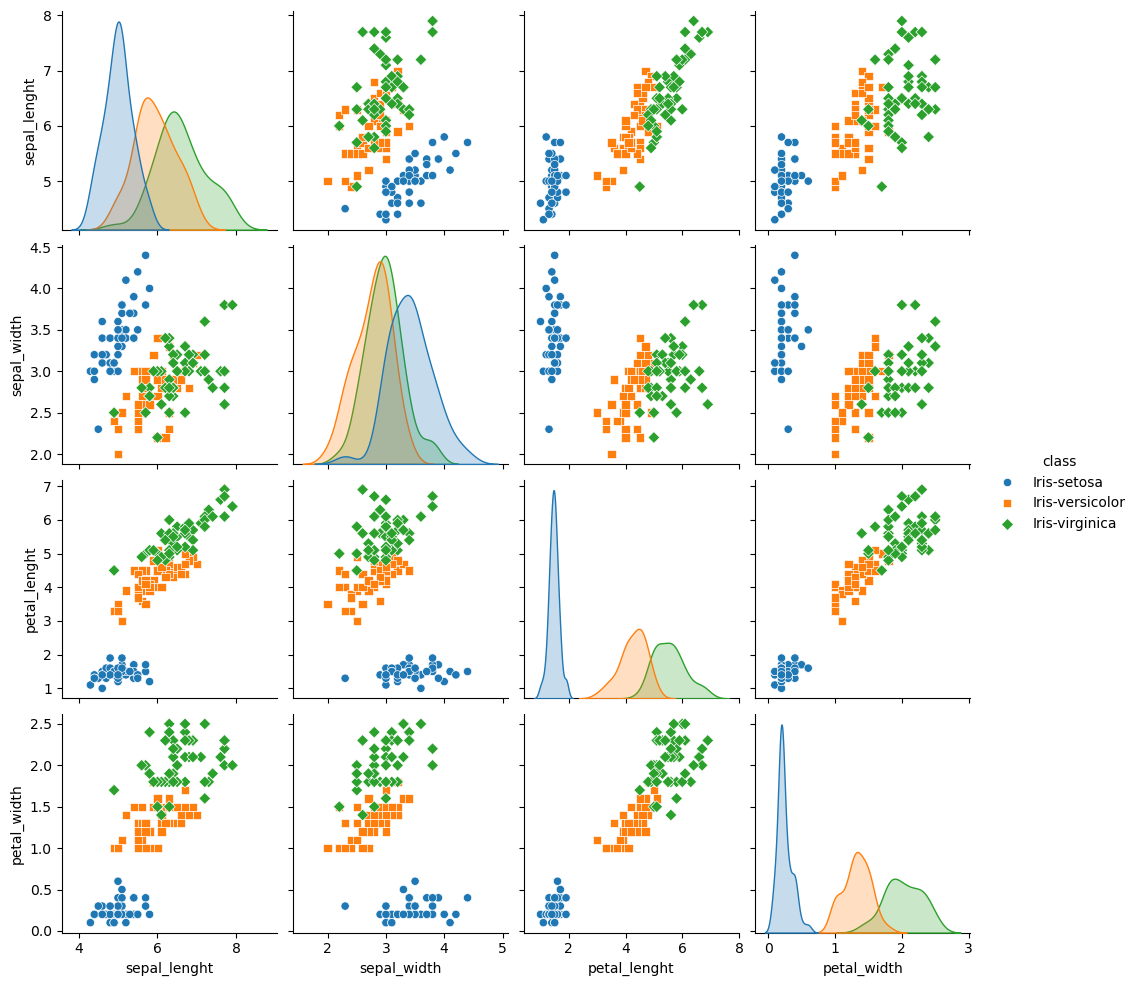

In [15]:
sns.pairplot(df, hue='class', markers=["o", "s", "D"])